In [2]:
import pandas as pd
import gymnasium as gym

import gym_lowcostrobot  # noqa

In [9]:
df_demo = pd.read_parquet('/Users/achenu/Documents/Research/robotics/github_repos/gym-lowcostrobot/demos/train-00000-of-00001_simu.parquet', engine='pyarrow')

In [10]:
df_demo.columns

Index(['observation.state', 'action', 'episode_index', 'frame_index',
       'timestamp', 'next.done', 'index', 'observation.images.top',
       'observation.images.front'],
      dtype='object')

In [11]:
df_demo

,observation.state,action,episode_index,frame_index,timestamp,next.done,index,observation.images.top,observation.images.front
0,"[0.07389037, 0.26932847, -6.5935144, 1.0578214...","[-4.482422, 107.92969, 114.697266, 57.74414, -...",0,0,0.000000,False,0,{'path': 'videos/image_top_episode_000000.mp4'...,{'path': 'videos/image_front_episode_000000.mp...
1,"[0.07045941, 0.23433155, -6.481187, 1.0690894,...","[-4.482422, 107.92969, 114.697266, 57.83203, -...",0,1,0.033292,False,1,{'path': 'videos/image_top_episode_000000.mp4'...,{'path': 'videos/image_front_episode_000000.mp...
2,"[0.06931645, 0.20509058, -6.383348, 1.0560966,...","[-4.3945312, 107.92969, 114.697266, 57.83203, ...",0,2,0.066583,False,2,{'path': 'videos/image_top_episode_000000.mp4'...,{'path': 'videos/image_front_episode_000000.mp...
3,"[0.06931302, 0.17766452, -6.302839, 1.0302716,...","[-4.482422, 107.92969, 114.697266, 57.83203, -...",0,3,0.099875,False,3,{'path': 'videos/image_top_episode_000000.mp4'...,{'path': 'videos/image_front_episode_000000.mp...
4,"[0.06893597, 0.15063426, -6.240298, 0.9993672,...","[-4.482422, 107.92969, 114.697266, 57.83203, -...",0,4,0.133167,False,4,{'path': 'videos/image_top_episode_000000.mp4'...,{'path': 'videos/image_front_episode_000000.mp...
...,...,...,...,...,...,...,...,...,...
2654,"[0.42263815, -0.11853333, -5.3212786, 1.047656...","[-24.785156, 95.009766, 62.314453, 65.91797, -...",5,345,10.933865,False,2654,{'path': 'videos/image_top_episode_000005.mp4'...,{'path': 'videos/image_front_episode_000005.mp...
2655,"[0.42265168, -0.12006875, -5.321289, 1.0461272...","[-24.785156, 94.921875, 62.314453, 65.83008, -...",5,346,10.965556,False,2655,{'path': 'videos/image_top_episode_000005.mp4'...,{'path': 'videos/image_front_episode_000005.mp...
2656,"[0.4226674, -0.121603645, -5.321298, 1.0461314...","[-24.785156, 94.833984, 62.314453, 65.83008, -...",5,347,10.997249,False,2656,{'path': 'videos/image_top_episode_000005.mp4'...,{'path': 'videos/image_front_episode_000005.mp...
2657,"[0.42421052, -0.12160326, -5.3213058, 1.046133...","[-24.873047, 94.833984, 62.314453, 65.83008, -...",5,348,11.028941,False,2657,{'path': 'videos/image_top_episode_000005.mp4'...,{'path': 'videos/image_front_episode_000005.mp...


In [6]:
list_actions = list(df_demo["action"])

In [7]:
len(list_actions)

39693

In [12]:
list_obs = list(df_demo["observation.state"])

In [13]:
list_obs[0]

array([ 0.07389037,  0.26932847, -6.5935144 ,  1.0578214 , -1.4270948 ,
       -0.5778052 ], dtype=float32)

In [8]:
env = gym.make("GPickPlaceCube-v0", render_mode = "human")#, observation_mode="state", render_mode="human", action_mode="ee")
env.reset()

max_step = 10000
for action in list_actions: 
    observation, reward, terminated, truncated, info = env.step(action)

    # print("Observation:", observation)
    # print("Reward:", reward)

    env.render()
    if terminated:
        if not truncated:
            print(f"Cube reached the target position at step: {env.current_step} with reward {reward}")
        else:
            print(
                f"Cube didn't reached the target position at step: {env.current_step} with reward {reward} but was truncated"
            )
        env.reset()

RuntimeError: `launch_passive` requires that the Python script be run under `mjpython` on macOS

In [7]:
df_demo = pd.read_parquet('../demos/demo.parquet', engine='pyarrow')

In [8]:
df_demo

,observation.arm_qpos,observation.arm_qvel,observation.cube_pos,observation.ee_pos
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.13, 0.015]","[-0.008753, 0.16143, 0.1817999]"
1,"[0.0010994276, -0.0019059612, 0.00016443989, -...","[0.16070369, -0.2796634, 0.025099693, -0.00398...","[-3.5458325e-21, 0.13, 0.0149302995]","[-0.008589999, 0.16164467, 0.18149437]"
2,"[0.0037360517, -0.0064474386, 0.00053295994, -...","[0.29171243, -0.50228345, 0.04073369, -0.00630...","[-8.619808e-21, 0.13, 0.014900682]","[-0.008153004, 0.1622112, 0.18068416]"
3,"[0.0072198883, -0.012390495, 0.0009625237, -0....","[0.33918616, -0.57730716, 0.040504333, -0.0060...","[-1.03056025e-20, 0.13, 0.014889304]","[-0.0075492486, 0.16297247, 0.17958796]"
4,"[0.010816205, -0.018431896, 0.0013050612, -0.0...","[0.32796144, -0.54768944, 0.027700672, -0.0034...","[-1.124787e-20, 0.13, 0.014885908]","[-0.006910101, 0.16374944, 0.17846453]"
...,...,...,...,...
437,"[0.13742222, -0.34124163, -0.3248956, -1.50374...","[0.025259305, 0.082525305, -0.13076513, 0.0290...","[0.015975028, 0.14795819, 0.053275365]","[0.014402353, 0.15575416, 0.097090594]"
438,"[0.13768643, -0.3404082, -0.32626644, -1.50344...","[0.024584526, 0.077669814, -0.12812403, 0.0293...","[0.01603643, 0.1481261, 0.05355767]","[0.01445506, 0.15581006, 0.097399004]"
439,"[0.13794358, -0.33962497, -0.32761016, -1.5031...","[0.02392952, 0.073011614, -0.12557618, 0.02952...","[0.016096715, 0.14829092, 0.053829614]","[0.014506619, 0.15586612, 0.09769604]"
440,"[0.13819389, -0.33888993, -0.32892767, -1.5028...","[0.023293655, 0.06854328, -0.12311836, 0.02973...","[0.016155904, 0.14845282, 0.05409157]","[0.014557068, 0.15592237, 0.09798215]"


In [10]:
list_ee_x_pos = [ee_pos[0] for ee_pos in list(df_demo["observation.ee_pos"])]
list_ee_y_pos = [ee_pos[1] for ee_pos in list(df_demo["observation.ee_pos"])]
list_ee_z_pos = [ee_pos[2] for ee_pos in list(df_demo["observation.ee_pos"])]

list_cube_x_pos = [ee_pos[0] for ee_pos in list(df_demo["observation.cube_pos"])]
list_cube_y_pos = [ee_pos[1] for ee_pos in list(df_demo["observation.cube_pos"])]
list_cube_z_pos = [ee_pos[2] for ee_pos in list(df_demo["observation.cube_pos"])]

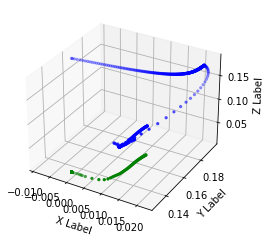

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(list_ee_x_pos, list_ee_y_pos, list_ee_z_pos, c='b', marker='.')  # Customize color and marker as needed

ax.scatter(list_cube_x_pos, list_cube_y_pos, list_cube_z_pos, c='g', marker='.')
# ax.scatter(ee_pos_start[0], ee_pos_start[1], ee_pos_start[2], c="r", marker="o")
# ax.scatter(ee_target_pos[0], ee_target_pos[1], ee_target_pos[2], c="orange", marker="o")

# Label axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
